This is a tiny example of using Stein Thinning updated to PyStan 3 from https://github.com/wilson-ye-chen/stein_thinning#installing-via-git.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import stan
from stein_thinning.thinning import thin

In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
mc = """
parameters {vector[2] x;}
model {x ~ multi_normal([0, 0], [[1, 0.8], [0.8, 1]]);}
"""
sm = stan.build(mc, random_seed=12345)
fit = sm.sample(num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!


In [4]:
smpl = fit['x'].T
grad = np.apply_along_axis(lambda x: sm.grad_log_prob(x.tolist()), 1, smpl)
idx = thin(smpl, grad, 40)

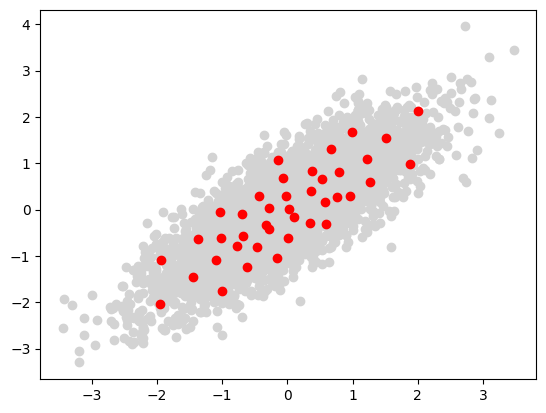

In [5]:
fig, ax = plt.subplots();
ax.scatter(smpl[:, 0], smpl[:, 1], color='lightgray');
ax.scatter(smpl[idx, 0], smpl[idx, 1], color='red');